# Linear regresion of customer amount spent on online shopping of clothes
## Dataset-Kagggle

Import different model 


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import file 

In [32]:
df=pd.read_csv('Ecommerce Customers')

Display data for understanding the data 


Display size and details of data 

In [33]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [35]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


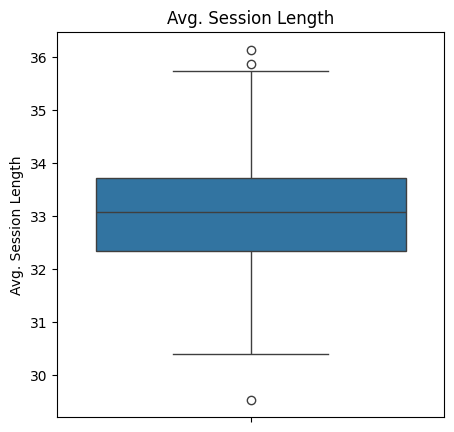

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Avg. Session Length'])
plt.title('Avg. Session Length')
plt.show()

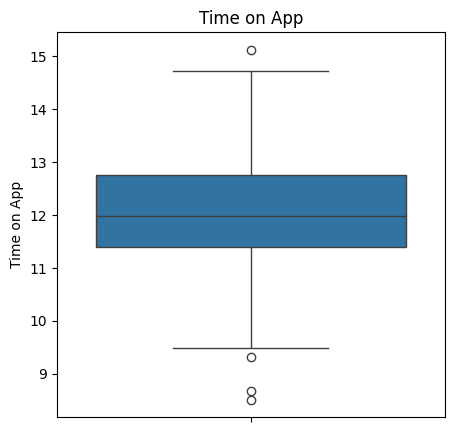

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Time on App'])
plt.title('Time on App')
plt.show()

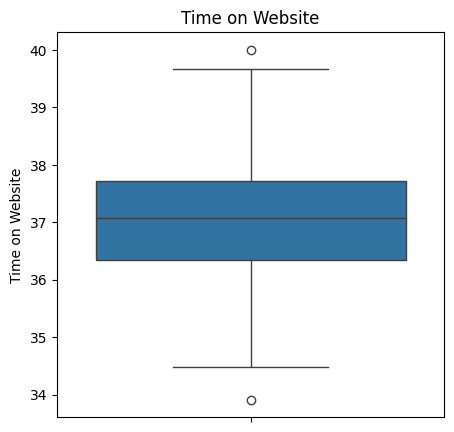

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Time on Website'])
plt.title('Time on Website')
plt.show()

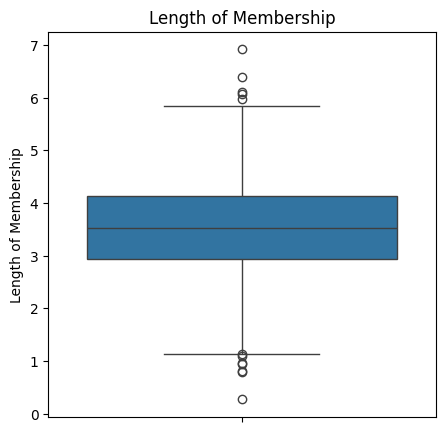

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Length of Membership'])
plt.title('Length of Membership')
plt.show()

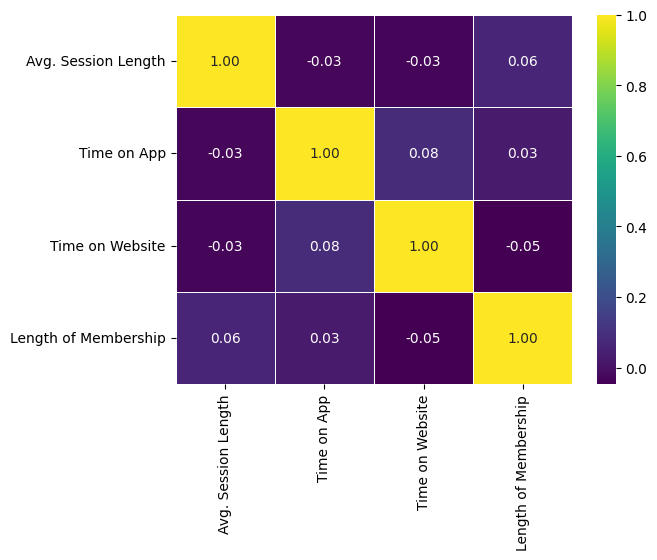

In [40]:
selected_col=['Avg. Session Length','Time on App','Time on Website','Length of Membership']
df_subset=df[selected_col]
correlation_matirx=df_subset.corr()
plt.Figure(figsize=(5,5))
sns.heatmap(
            correlation_matirx,
            annot=True,
            cmap='viridis',
            fmt=".2f",
            linewidths=.5
            )
plt.show()

Fearture selection using forward method 

In [41]:
Label='Yearly Amount Spent'
to_drop=['Email','Address','Avatar']
feature= [column for column in df.columns]
x,y=df[feature],df[Label]
x=x.drop(to_drop,axis=1)
x=x.drop(Label,axis=1)
x


,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


Split data in traing and test data set 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_trained_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)

Do feature selection 

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
Lr=LinearRegression()

In [49]:
Forward_selection = SequentialFeatureSelector(Lr,
                                n_features_to_select='auto', 
                                direction='forward',
                                scoring='neg_mean_squared_error', 
                                cv=5)
Forward_selection.fit(X_trained_sc, y_train)
selected_features = X_train.columns[Forward_selection.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['Time on App', 'Length of Membership']


Out four only two got selected. Need to train model on those features

In [50]:
X_train_transformed= Forward_selection.transform(X_trained_sc)
X_test_trasnformed= Forward_selection.transform(X_test_sc)
Traning_model=LinearRegression()
Traning_model.fit(X_train_transformed,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [51]:
R2_Traning_model=Traning_model.score(X_train_transformed,y_train)
print('R2_Traning_model:      ',round(R2_Traning_model,2))
print('Intercept_TraningModel:',round(Traning_model.intercept_,2))
Traning_model.coef_
table=pd.DataFrame(Traning_model.coef_ , selected_features,columns=['Coef'] )
print(table)

R2_Traning_model:       0.89
Intercept_TraningModel: 501.99
                           Coef
Time on App           37.972000
Length of Membership  64.414845


Model fit on test data 

In [52]:
y_test_predict=Traning_model.predict(X_test_trasnformed)

In [53]:
Compare=pd.DataFrame({'Actual':y_test,'predicted':y_test_predict})
print(Compare.head())

         Actual   predicted
361  401.033135  439.306975
73   534.777188  566.726530
374  418.602742  489.761054
155  503.978379  523.694085
104  410.069611  464.078278


In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_new = r2_score(y_test, y_test_predict)
mse_new = mean_squared_error(y_test, y_test_predict)
mae_new = mean_absolute_error(y_test, y_test_predict)

print("R² on new data:", r2_new)
print("MSE on new data:", mse_new)
print("MAE on new data:", mae_new)

R² on new data: 0.7885407866755753
MSE on new data: 1047.0891136620141
MAE on new data: 26.168028488205827
